# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


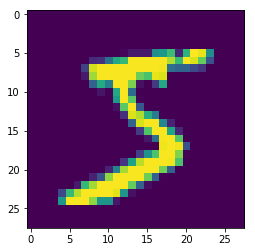

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:5]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))#3
model.add(Convolution2D(16, (3, 3), activation='relu'))#5
model.add(MaxPooling2D(pool_size=(2, 2)))#10
model.add(Convolution2D(16, (3, 3), activation='relu'))#12
model.add(Convolution2D(16, (3, 3), activation='relu'))#14
model.add(Convolution2D(16, (3, 3), activation='relu'))#16
model.add(Convolution2D(16, (3, 3), activation='relu'))#18
model.add(Convolution2D(16, (3, 3), activation='relu'))#20
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 16)          2320      
__________

The model is vanilla model. Using only convolution layer with kernel 3X3 and one Max pooling layer. So Total parameters generated/trained by this model is 13874

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Here Using default adam optimizer and loss function as categorical_crossentropy.

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.2754 - acc: 0.9149
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0845 - acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0643 - acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0522 - acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0453 - acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0404 - acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0359 - acc: 0.9891
Epoch 8/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0331 - acc: 0.9900
Epoch 9/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0286 - acc: 0.9912
Epoch 10/10
60000/60000 [==============================] - 11s 178us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.033597394611436175, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[2.16549053e-11 1.37785730e-06 5.62404921e-07 6.68485313e-07
  3.66591861e-11 2.45355336e-09 7.21870594e-19 9.99997020e-01
  5.21486250e-08 2.53861771e-07]
 [5.41787699e-07 5.17354010e-06 9.99991298e-01 3.11786152e-10
  7.74553371e-07 6.82107615e-09 2.17429078e-06 1.37283418e-09
  2.30876864e-08 2.91614044e-09]
 [3.85293308e-09 9.99998569e-01 3.25859184e-09 1.06316345e-12
  7.95661720e-07 1.75142588e-07 1.31263833e-09 3.91656897e-07
  5.82038346e-08 1.79893733e-09]
 [9.99757469e-01 1.93787469e-06 1.58639011e-07 2.20684299e-07
  5.16154651e-05 4.86157387e-06 1.50351683e-04 1.06889161e-06
  6.13338784e-07 3.18500825e-05]
 [1.97761824e-11 4.05496046e-08 2.99762632e-08 1.83122587e-10
  9.99998808e-01 3.28115846e-08 5.59149983e-11 5.49092540e-08
  3.88544635e-07 7.08786729e-07]
 [2.05317048e-11 9.99999881e-01 1.63514532e-11 1.26082350e-16
  3.30845502e-08 1.44890225e-10 1.31571121e-12 2.81407928e-08
  1.09716340e-10 4.53429915e-12]
 [1.69927668e-12 2.46214404e-06 3.20971583e-10 8.10829160e

In [19]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7f515d0dd5f8>, 'conv2d_10': <keras.layers.convolutional.Conv2D object at 0x7f515d0dd5c0>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7f515d0d1780>, 'conv2d_11': <keras.layers.convolutional.Conv2D object at 0x7f515d0ddb00>, 'conv2d_12': <keras.layers.convolutional.Conv2D object at 0x7f515d0dd978>, 'conv2d_13': <keras.layers.convolutional.Conv2D object at 0x7f515d089048>, 'conv2d_14': <keras.layers.convolutional.Conv2D object at 0x7f515d09edd8>, 'conv2d_15': <keras.layers.convolutional.Conv2D object at 0x7f515d04d9b0>, 'conv2d_16': <keras.layers.convolutional.Conv2D object at 0x7f515cfe5dd8>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f515d00e358>, 'activation_1': <keras.layers.core.Activation object at 0x7f515cfba198>}


Showcasing the different filters/channels.

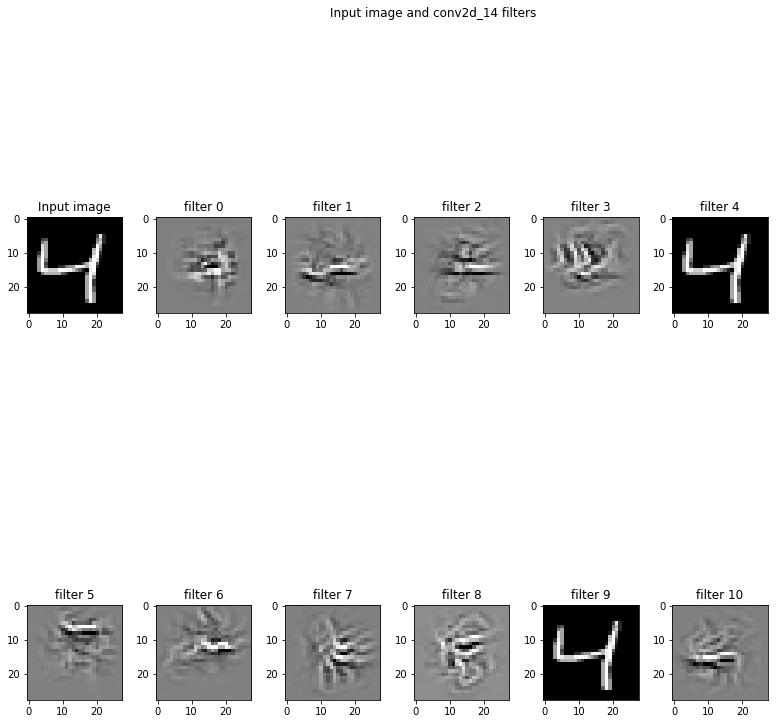

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()